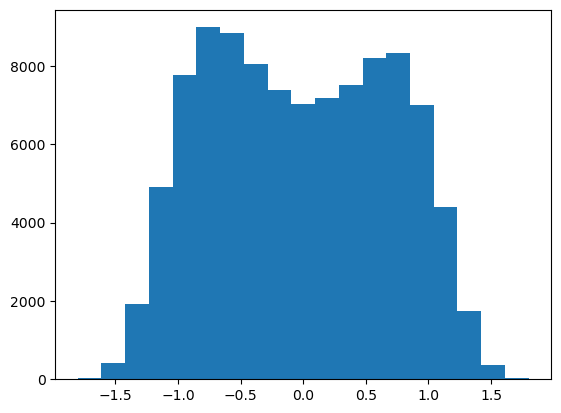

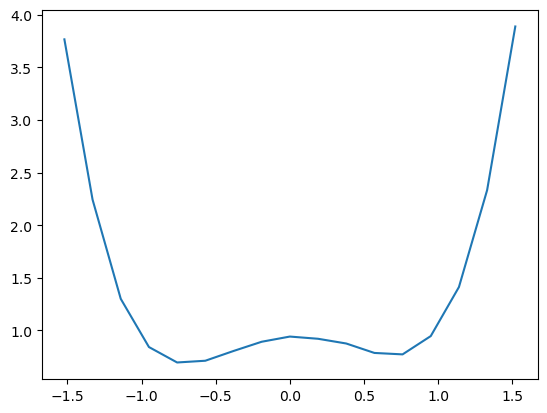

In [5]:
import propagators
import energy_landscapes
import long_simulation

kT = 1
x_init_coord = 0.0
dt = 0.001
nsteps = 100000
save_period = 10 #in steps
n_parallel = 10
nbins = 20
system1 = energy_landscapes.unit_double_well()

xd, ed, rp = long_simulation.recover_energy_landscape(propagators.propagate_nd, system1, kT, x_init_coord, dt, nsteps, save_period, n_parallel, nbins)


In [2]:
rp.shape

(100, 2)